<a href="https://colab.research.google.com/github/Madhavkumbhar011/Data-Analyst-Project-/blob/main/Olympic_Data_Analysis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

step 1 : Data Preparation

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_rows = 4000
pd.options.display.max_columns = None
import os



In [ ]:
df = pd.read_csv("/content/Summer-Olympic-medals-1976-to-2008 (1).csv" , encoding='latin-1')


In [ ]:
print(df.head())

       City    Year     Sport Discipline           Event  \
0  Montreal  1976.0  Aquatics     Diving  3m springboard   
1  Montreal  1976.0  Aquatics     Diving  3m springboard   
2  Montreal  1976.0  Aquatics     Diving  3m springboard   
3  Montreal  1976.0  Aquatics     Diving  3m springboard   
4  Montreal  1976.0  Aquatics     Diving    10m platform   

                    Athlete Gender Country_Code        Country Event_gender  \
0           KÖHLER, Christa  Women          GDR   East Germany            W   
1       KOSENKOV, Aleksandr    Men          URS   Soviet Union            M   
2      BOGGS, Philip George    Men          USA  United States            M   
3  CAGNOTTO, Giorgio Franco    Men          ITA          Italy            M   
4    WILSON, Deborah Keplar  Women          USA  United States            W   

    Medal  
0  Silver  
1  Bronze  
2    Gold  
3  Silver  
4  Bronze  


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15433 entries, 0 to 15432
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   City          15316 non-null  object 
 1   Year          15316 non-null  float64
 2   Sport         15316 non-null  object 
 3   Discipline    15316 non-null  object 
 4   Event         15316 non-null  object 
 5   Athlete       15316 non-null  object 
 6   Gender        15316 non-null  object 
 7   Country_Code  15316 non-null  object 
 8   Country       15316 non-null  object 
 9   Event_gender  15316 non-null  object 
 10  Medal         15316 non-null  object 
dtypes: float64(1), object(10)
memory usage: 1.3+ MB
None


In [ ]:
print(df.describe())

               Year
count  15316.000000
mean    1993.620789
std       10.159851
min     1976.000000
25%     1984.000000
50%     1996.000000
75%     2004.000000
max     2008.000000


In [ ]:
print(df.Gender.unique())
print(df.Event_gender.unique())

['Women' 'Men' nan]
['W' 'M' 'X' nan]


In [ ]:
df = df.drop('Event_gender',axis =1)
df = df.drop('Country_Code',axis = 1)
df.head()

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country,Medal
0,Montreal,1976.0,Aquatics,Diving,3m springboard,"KÖHLER, Christa",Women,East Germany,Silver
1,Montreal,1976.0,Aquatics,Diving,3m springboard,"KOSENKOV, Aleksandr",Men,Soviet Union,Bronze
2,Montreal,1976.0,Aquatics,Diving,3m springboard,"BOGGS, Philip George",Men,United States,Gold
3,Montreal,1976.0,Aquatics,Diving,3m springboard,"CAGNOTTO, Giorgio Franco",Men,Italy,Silver
4,Montreal,1976.0,Aquatics,Diving,10m platform,"WILSON, Deborah Keplar",Women,United States,Bronze


Step 2 : Data Cleaning

In [ ]:
print(df.isnull().sum())
df = df.dropna(how = 'all')
print(df.isnull().sum())
df = df.astype({'Year':'int'})
df.head()

City          117
Year          117
Sport         117
Discipline    117
Event         117
Athlete       117
Gender        117
Country       117
Medal         117
dtype: int64
City          0
Year          0
Sport         0
Discipline    0
Event         0
Athlete       0
Gender        0
Country       0
Medal         0
dtype: int64


,City,Year,Sport,Discipline,Event,Athlete,Gender,Country,Medal
0,Montreal,1976,Aquatics,Diving,3m springboard,"KÖHLER, Christa",Women,East Germany,Silver
1,Montreal,1976,Aquatics,Diving,3m springboard,"KOSENKOV, Aleksandr",Men,Soviet Union,Bronze
2,Montreal,1976,Aquatics,Diving,3m springboard,"BOGGS, Philip George",Men,United States,Gold
3,Montreal,1976,Aquatics,Diving,3m springboard,"CAGNOTTO, Giorgio Franco",Men,Italy,Silver
4,Montreal,1976,Aquatics,Diving,10m platform,"WILSON, Deborah Keplar",Women,United States,Bronze


In [ ]:
df_cleaned = df.dropna()

In [ ]:
print(df_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
Index: 15316 entries, 0 to 15432
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        15316 non-null  object
 1   Year        15316 non-null  int64 
 2   Sport       15316 non-null  object
 3   Discipline  15316 non-null  object
 4   Event       15316 non-null  object
 5   Athlete     15316 non-null  object
 6   Gender      15316 non-null  object
 7   Country     15316 non-null  object
 8   Medal       15316 non-null  object
dtypes: int64(1), object(8)
memory usage: 1.2+ MB
None


Step 3 : Exploratory Data Anlysis (EDA)

 3.1 Total Medal Count by Country

In [ ]:
# Total medals won by each country
medals_by_country = df_cleaned.groupby('Country')['Medal'].count().sort_values(ascending=False)

In [ ]:
medals_by_country.head()

,Medal
Country,
United States,1992
Soviet Union,1021
Australia,798
Germany,691
China,679


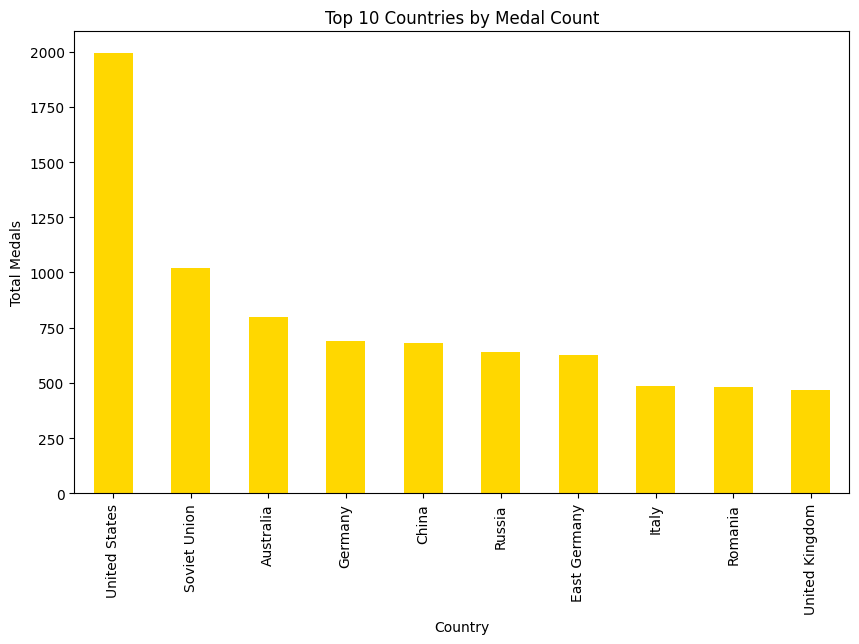

In [ ]:
# plotting the top 10 countries by medals
plt.figure(figsize=(10,6))
medals_by_country.head(10).plot(kind='bar',color='gold')
plt.title("Top 10 Countries by Medal Count")
plt.xlabel("Country")
plt.ylabel("Total Medals")
plt.show()

3.2 Medals Won Over The Years

In [ ]:
# Grouping by year and counting the medals won
medals_over_years = df_cleaned.groupby('Year')['Medal'].count()

In [ ]:
medals_over_years.head()

,Medal
Year,
1976,1305
1980,1387
1984,1459
1988,1546
1992,1705


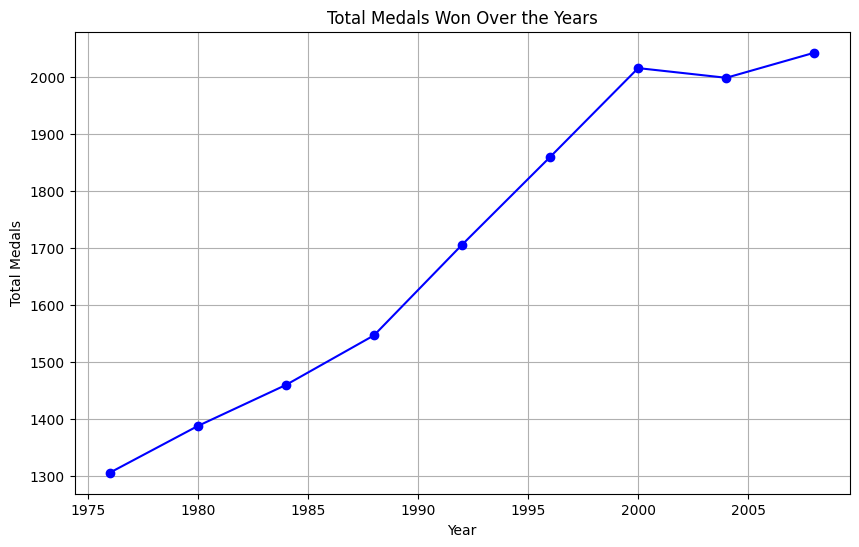

In [ ]:

# Plotting the trend of medals won over the years
plt.figure(figsize=(10,6))
plt.plot(medals_over_years.index,medals_over_years.values,marker='o',linestyle='-',color='b')
plt.title("Total Medals Won Over the Years")
plt.xlabel("Year")
plt.ylabel("Total Medals")
plt.grid(True)
plt.show()

3.3 Gender Distribution in Event


In [ ]:
# Gender Distribution in events
gender_distribution = df_cleaned['Gender'].value_counts()

In [ ]:
gender_distribution.head()

,count
Gender,
Men,9388
Women,5928


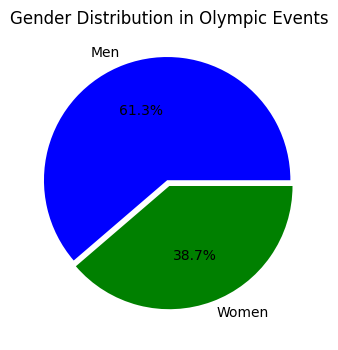

In [ ]:
# Plotting gender Distribution
plt.figure(figsize=(6,4))
gender_distribution.plot(kind='pie',autopct='%1.1f%%',colors=['b','g'],explode=[0.05,0])
plt.title('Gender Distribution in Olympic Events')
plt.ylabel('')
plt.show()

In [ ]:
gender_distribution = df_cleaned[['Event','Gender']]
gender_distribution = gender_distribution.groupby(['Event','Gender'])['Gender'].count()
gender_distribution.head()

,,Gender
Event,Gender,
+ 100kg (heavyweight),Men,16
+ 100kg (super heavyweight),Men,18
+ 105kg,Men,9
"+ 108kg, total (super heavyweight)",Men,3
"+ 110kg, total (super heavyweight)",Men,15


3.4 Top Atheletes with Most Medals

In [ ]:
# group by Athletes and count the number of medals
athlete_medal_count = df_cleaned.groupby('Athlete')['Medal'].count().sort_values(ascending=False)

In [ ]:
athlete_medal_count.head()

,Medal
Athlete,
"PHELPS, Michael",16
"FISCHER, Birgit",12
"NEMOV, Alexei",12
"TORRES, Dara",12
"THOMPSON, Jenny",12


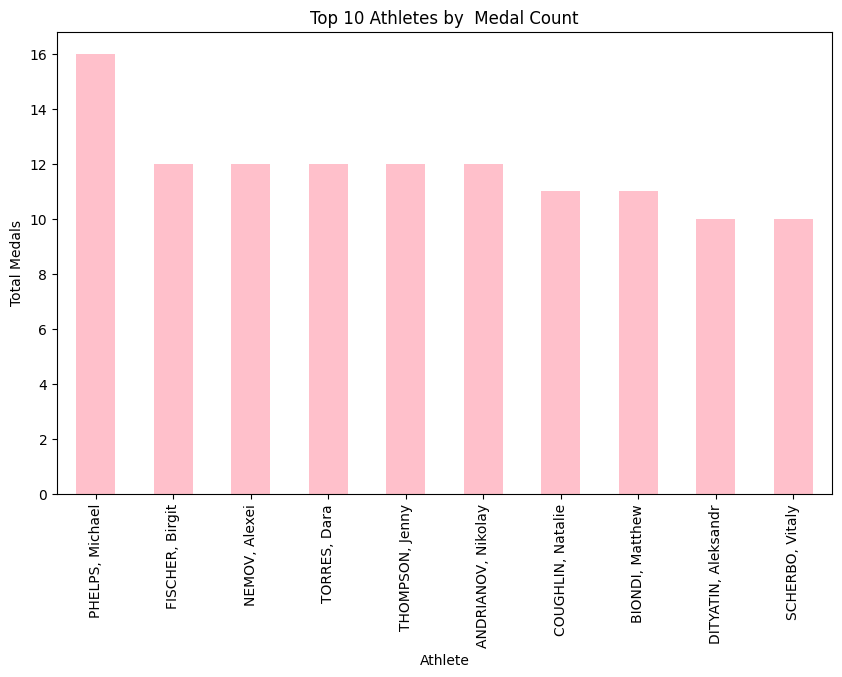

In [ ]:
# Plotting the top 10 athletes with most medals

plt.figure(figsize=(10,6))
athlete_medal_count.head(10).plot(kind='bar',color='pink')
plt.title("Top 10 Athletes by  Medal Count")
plt.xlabel("Athlete")
plt.ylabel("Total Medals")
plt.show()

3.5 which city hosted maximum no. of olympic

In [ ]:
max_olympic_city = df_cleaned[['City','Year']]
max_olympic_city = max_olympic_city.drop_duplicates('Year')


In [ ]:
max_olympic_city.head()

,City,Year
0,Montreal,1976
1422,Moscow,1980
2809,Los Angeles,1984
4268,Seoul,1988
5814,Barcelona,1992


3.6 Which City hosted most event

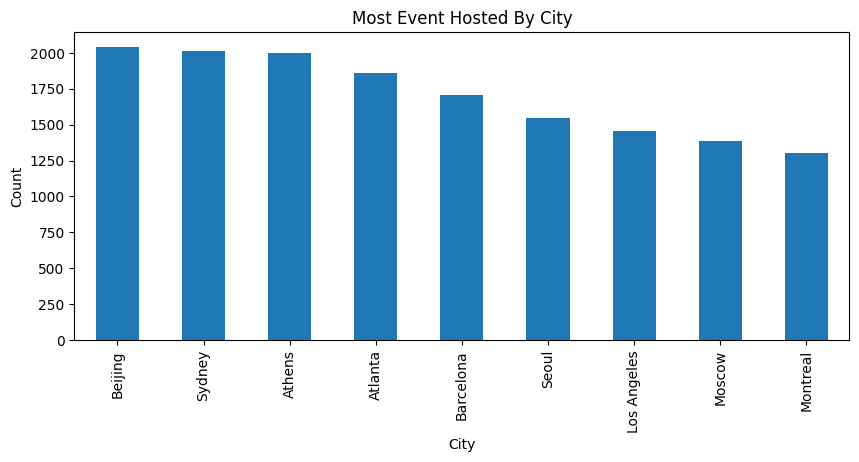

In [ ]:
max_event_city = df_cleaned["City"].value_counts()
max_event_city.columns = ['City','Count']
plt.figure(figsize=(10,4))
max_event_city.plot.bar(x='City',y = "Count")
plt.title("Most Event Hosted By City")
plt.xlabel("City")
plt.ylabel("Count")
plt.show()

3.7 Understand the event themselves

In [ ]:
Understand_event = df_cleaned[['Sport','Discipline','Event']].drop_duplicates()
print("Total number of unique events are helds so far are :",len(Understand_event))
Understand_event.head()

Total number of unique events are helds so far are : 334


,Sport,Discipline,Event
0,Aquatics,Diving,3m springboard
4,Aquatics,Diving,10m platform
12,Aquatics,Swimming,4x100m freestyle relay
13,Aquatics,Swimming,400m freestyle
15,Aquatics,Swimming,1500m freestyle


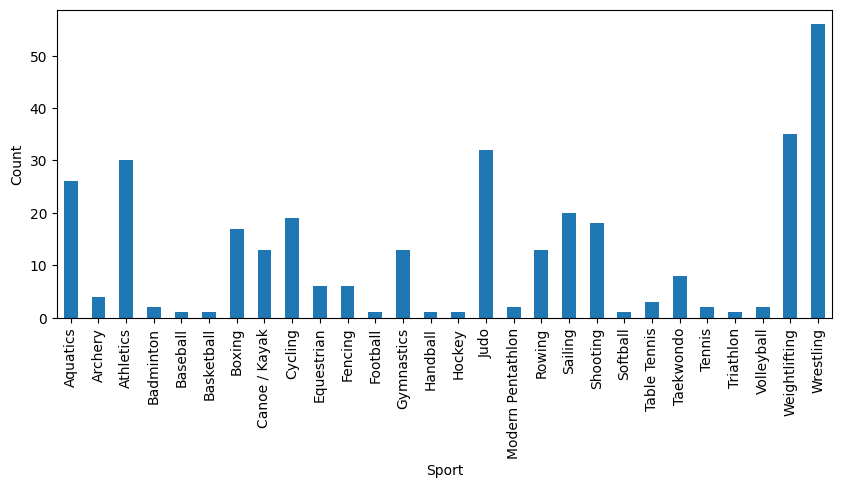

In [ ]:
Understand_event = Understand_event.groupby(['Sport'])['Sport'].size()
plt.figure(figsize=(10,4))
Understand_event.plot.bar(x ='Sport',y = 'Count')
plt.xlabel("Sport")
plt.ylabel("Count")
plt.show()

3.8 Can you tell me which country has dominated any particular sport

In [ ]:
dominated_sport = df_cleaned.groupby(['Sport','Country'])['Country'].count().reset_index(name = 'Count').sort_values(ascending = [True,False],by = ['Sport','Count'])
dominated_sport['Sport'].unique()

array(['Aquatics', 'Archery', 'Athletics', 'Badminton', 'Baseball',
       'Basketball', 'Boxing', 'Canoe / Kayak', 'Cycling', 'Equestrian',
       'Fencing', 'Football', 'Gymnastics', 'Handball', 'Hockey', 'Judo',
       'Modern Pentathlon', 'Rowing', 'Sailing', 'Shooting', 'Softball',
       'Table Tennis', 'Taekwondo', 'Tennis', 'Triathlon', 'Volleyball',
       'Weightlifting', 'Wrestling'], dtype=object)

In [ ]:
inp = 'Archery'
try:
  inp = input("Select a Sport from above list")
except:
  print("Input is interrupted")
temp = dominated_sport[dominated_sport['Sport'] == inp].head(3)
print(temp)

Select a Sport from above listHockey
      Sport      Country  Count
431  Hockey  Netherlands    159
425  Hockey    Australia    145
428  Hockey      Germany     81
